In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

### Preparing X and y variables

In [7]:
X = df.drop(columns=['math score'])
y = df['math score']

print(X.shape)
print(y.shape)

(1000, 7)
(1000,)


In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### Creating column transformer to transform numeric and categorical variables

In [10]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

### Splitting the data into Train and Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 19)
(800,)
(200, 19)
(200,)


### Create an evaluate fuinction to evaluate the models performance

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

### Model Training and Evaluation Results

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance on Training set")
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- R2 Score: {:.4f}".format(train_r2))

    print("--------------------------------------")

    print("Model Performance on Test set")
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- R2 Score: {:.4f}".format(test_r2))

    r2_list.append(test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance on Training set
- Mean Absolute Error: 4.2671
- Root Mean Squared Error: 2.0657
- R2 Score: 0.8743
--------------------------------------
Model Performance on Test set
- Mean Absolute Error: 4.2158
- Root Mean Squared Error: 2.0532
- R2 Score: 0.8803


Ridge Regression
Model Performance on Training set
- Mean Absolute Error: 4.2650
- Root Mean Squared Error: 2.0652
- R2 Score: 0.8743
--------------------------------------
Model Performance on Test set
- Mean Absolute Error: 4.2111
- Root Mean Squared Error: 2.0521
- R2 Score: 0.8806


Lasso Regression
Model Performance on Training set
- Mean Absolute Error: 5.2063
- Root Mean Squared Error: 2.2817
- R2 Score: 0.8071
--------------------------------------
Model Performance on Test set
- Mean Absolute Error: 5.1579
- Root Mean Squared Error: 2.2711
- R2 Score: 0.8253


K Neighbors Regressor
Model Performance on Training set
- Mean Absolute Error: 4.5167
- Root Mean Squared Error: 2.1253
- R2 Score: 0.8

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880345
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.850299
6,AdaBoost Regressor,0.845504
8,XGBoost Regressor,0.827797
2,Lasso Regression,0.825320
3,K Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.725978


### Linear Regression Model

In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


### Plotting the true and the predicted values

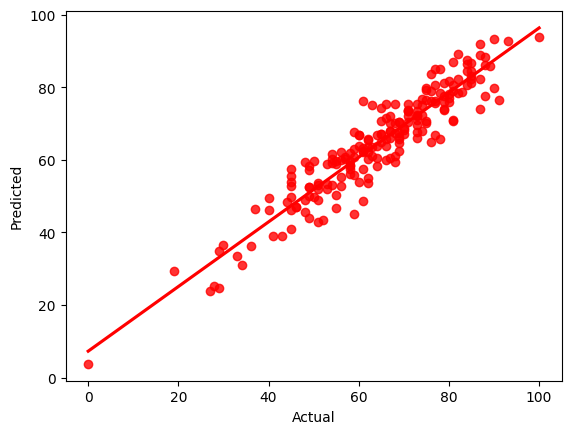

In [29]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Difference between Actual and Predicted Values

In [30]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
